In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from numba import cuda
from sklearn.model_selection import StratifiedKFold
import cv2
from sklearn.preprocessing import OneHotEncoder

In [2]:
X_ = joblib.load("converted_img.pkl")
y_ = joblib.load("label.pkl")

In [4]:
X = joblib.load("CV2_float32.pkl")
y = joblib.load("label.pkl")

In [39]:
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1)
encoder.fit(y)
y = encoder.transform(y)

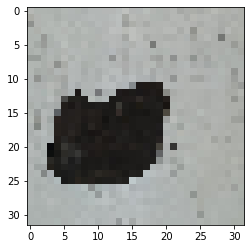

In [28]:
plt.imshow(X_[5])

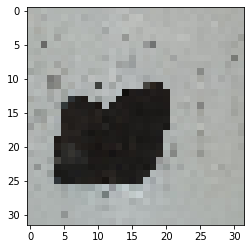

In [29]:
plt.imshow(X[5])

In [32]:
X[5]

array([[[0.69019608, 0.69803922, 0.68627451],
        [0.68235294, 0.70196078, 0.68627451],
        [0.70980392, 0.72941176, 0.71372549],
        ...,
        [0.68235294, 0.68627451, 0.66666667],
        [0.66666667, 0.6745098 , 0.65490196],
        [0.67843137, 0.68627451, 0.6745098 ]],

       [[0.70980392, 0.71372549, 0.69411765],
        [0.68627451, 0.69411765, 0.68235294],
        [0.65098039, 0.65882353, 0.65490196],
        ...,
        [0.6627451 , 0.67058824, 0.65098039],
        [0.68235294, 0.69019608, 0.67058824],
        [0.68235294, 0.69019608, 0.67843137]],

       [[0.71372549, 0.72156863, 0.70980392],
        [0.68627451, 0.69411765, 0.68235294],
        [0.69411765, 0.71372549, 0.69803922],
        ...,
        [0.68235294, 0.69019608, 0.67843137],
        [0.67843137, 0.68627451, 0.6745098 ],
        [0.6745098 , 0.68235294, 0.6627451 ]],

       ...,

       [[0.67843137, 0.69411765, 0.69019608],
        [0.66666667, 0.69019608, 0.68235294],
        [0.68627451, 0

In [33]:
X_[5]

array([[[0.71372551, 0.72156864, 0.70980394],
        [0.68627453, 0.70588237, 0.6901961 ],
        [0.68627453, 0.70588237, 0.6901961 ],
        ...,
        [0.68235296, 0.6901961 , 0.67058825],
        [0.6901961 , 0.69803923, 0.68627453],
        [0.67843139, 0.68627453, 0.66666669]],

       [[0.66666669, 0.67058825, 0.64705884],
        [0.69411767, 0.7019608 , 0.6901961 ],
        [0.69411767, 0.71372551, 0.69803923],
        ...,
        [0.68235296, 0.6901961 , 0.67843139],
        [0.66274512, 0.67058825, 0.65882355],
        [0.67843139, 0.68627453, 0.66666669]],

       [[0.56078434, 0.56862748, 0.55686277],
        [0.69411767, 0.7019608 , 0.6901961 ],
        [0.6901961 , 0.70980394, 0.69411767],
        ...,
        [0.67058825, 0.67843139, 0.65882355],
        [0.69803923, 0.70588237, 0.68627453],
        [0.67450982, 0.68235296, 0.66274512]],

       ...,

       [[0.67450982, 0.69803923, 0.6901961 ],
        [0.66666669, 0.6901961 , 0.68235296],
        [0.67058825, 0

In [34]:
pd.Series((np.reshape(X_[5], (-1))) == (np.reshape(X[5], (-1)))).value_counts()

False    3072
dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [47]:
es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, mode="max")

In [49]:
Input = keras.layers.Input(shape=X[0].shape)
x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 2s 8ms/step - loss: 1.2849 - accuracy: 0.4736 - val_loss: 2.3407 - val_accuracy: 0.1841
Epoch 2/100
171/171 [==============================] - 1s 7ms/step - loss: 0.8626 - accuracy: 0.6335 - val_loss: 1.6337 - val_accuracy: 0.3176
Epoch 3/100
171/171 [==============================] - 1s 7ms/step - loss: 0.7226 - accuracy: 0.6991 - val_loss: 0.8919 - val_accuracy: 0.6055
Epoch 4/100
171/171 [==============================] - 1s 6ms/step - loss: 0.6240 - accuracy: 0.7452 - val_loss: 0.6941 - val_accuracy: 0.7071
Epoch 5/100
171/171 [==============================] - 1s 7ms/step - loss: 0.5541 - accuracy: 0.7804 - val_loss: 0.6524 - val_accuracy: 0.7291
Epoch 6/100
171/171 [==============================] - 1s 6ms/step - loss: 0.4882 - accuracy: 0.8126 - val_loss: 0.6048 - val_accuracy: 0.7582
Epoch 7/100
171/171 [==============================] - 1s 7ms/step - loss: 0.4417 - accuracy: 0.8297 - val_loss: 0.5641 - val_accuracy: 0.7731

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, shuffle=True)

In [51]:
Input = keras.layers.Input(shape=X[0].shape)
x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 3s 12ms/step - loss: 1.0540 - accuracy: 0.5756 - val_loss: 1.7775 - val_accuracy: 0.2242
Epoch 2/100
171/171 [==============================] - 2s 10ms/step - loss: 0.6001 - accuracy: 0.7720 - val_loss: 1.3620 - val_accuracy: 0.3995
Epoch 3/100
171/171 [==============================] - 1s 8ms/step - loss: 0.4418 - accuracy: 0.8469 - val_loss: 0.6870 - val_accuracy: 0.7297
Epoch 4/100
171/171 [==============================] - 1s 8ms/step - loss: 0.3390 - accuracy: 0.8978 - val_loss: 0.4325 - val_accuracy: 0.8533
Epoch 5/100
171/171 [==============================] - 2s 9ms/step - loss: 0.2596 - accuracy: 0.9313 - val_loss: 0.2974 - val_accuracy: 0.9176
Epoch 6/100
171/171 [==============================] - 1s 8ms/step - loss: 0.2015 - accuracy: 0.9566 - val_loss: 0.2375 - val_accuracy: 0.9401
Epoch 7/100
171/171 [==============================] - 1s 8ms/step - loss: 0.1613 - accuracy: 0.9727 - val_loss: 0.2149 - val_accuracy: 0.94